# 필요한 라이브러리 import 하기

In [18]:
from selenium import webdriver as wd
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

크롬 드라이버 url과 연결하여 홈페이지 열기

In [76]:
driver= wd.Chrome("chromedriver.exe")
driver.get("https://www.youtube.com/channel/UCyn-K7rZLXjGl7VXGweIlcA/videos")

In [7]:
scroll_time = 1     # 드라이버가 수행할때 시각적으로 보이게 타임슬리프 설정

In [15]:
body = driver.find_element_by_tag_name("body")   # 화면의 본문인 body 부분

스크롤 다운 명령 식

In [16]:
while True:
    last = driver.execute_script("return document.documentElement.scrollHeight")
    print("last_page:", last)  
    
    for i in range(10):
        body.send_keys(Keys.END)
        time.sleep(scroll_time)
    
    new = driver.execute_script("return document.documentElement.scrollHeight")
    print("new_page:", new)
    
    if new == last:
        break 
        

last_page: 23303
new_page: 23303


In [17]:
page = driver.page_source

In [50]:
soup = BeautifulSoup(page, 'html.parser')

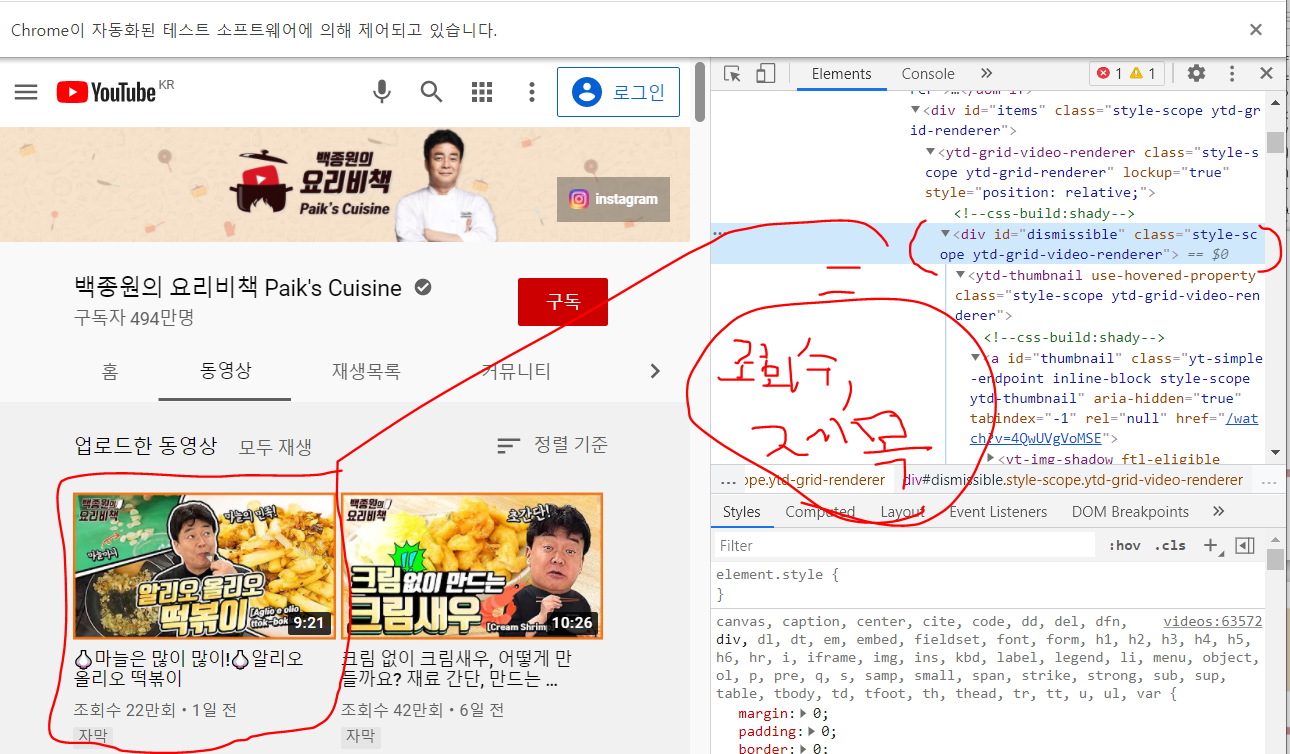

In [51]:
# 모든 동영상의 제목, 조회수 정보 필요 ->  id 속성이 dimissible 선택

all_video = soup.find_all(id="dismissible")
all_video
# 밑에 보면, 제목과 조회수 등 이 포함된 모든 동영상을 확인 할 수 있다. 

[<div class="style-scope ytd-grid-video-renderer" id="dismissible"><ytd-thumbnail class="style-scope ytd-grid-video-renderer" use-hovered-property=""><!--css-build:shady--><a aria-hidden="true" class="yt-simple-endpoint inline-block style-scope ytd-thumbnail" href="/watch?v=4QwUVgVoMSE" id="thumbnail" rel="null" tabindex="-1">
 <yt-img-shadow class="style-scope ytd-thumbnail no-transition" ftl-eligible="" loaded="" style="background-color: transparent;"><!--css-build:shady--><img alt="" class="style-scope yt-img-shadow" id="img" src="https://i.ytimg.com/vi/4QwUVgVoMSE/hqdefault.jpg?sqp=-oaymwEcCNACELwBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&amp;rs=AOn4CLBnWwroIUUkUUSqoDlykiskfFhzbQ" width="210"/></yt-img-shadow>
 <div class="style-scope ytd-thumbnail" id="overlays"><ytd-thumbnail-overlay-time-status-renderer class="style-scope ytd-thumbnail" overlay-style="DEFAULT"><!--css-build:shady--><yt-icon class="style-scope ytd-thumbnail-overlay-time-status-renderer" disable-upgrade="" hidden=""></yt-i

유투브 "제목" 크롤링

In [72]:
title_list= []
for video in all_video:
    title=video.find(id="video-title")
    title_list.append(title.text.strip())


유투브 "비디오 시간" 크롤링 

In [77]:
video_time_list= []
for video in all_video:
    video_time = video.find("span", {"class":"style-scope ytd-thumbnail-overlay-time-status-renderer"})
    video_time_list.append(video_time.text.strip())

유투브 "조회수" 크롤링 

In [78]:
view_num_list = []

for video in all_video:
    view_num= video.find("span", {"class":"style-scope ytd-grid-video-renderer"})
    view_num_list.append(view_num.text.strip())
    

In [80]:
# 필요한 정보들 추출 했으니, 모두 합하여 딕셔너리 만들기

dict_youtube = {"title": title_list, "time":video_time_list, "view_num": view_num_list }


# 그래프 만들기 

In [82]:
import pandas as pd
final_one= pd.DataFrame(dict_youtube)
final_one

,title,time,view_num
0,🧄마늘은 많이 많이!🧄알리오올리오 떡볶이,9:21,조회수 22만회
1,"크림 없이 크림새우, 어떻게 만들까요? 재료 간단, 만드는 법은 더 간단!",10:26,조회수 42만회
2,'부'대찌개맛 '뿌'햄라면,5:25,조회수 58만회
3,이 카레의 주인공은 '고기'입니다. 고기 듬뿍 뒷다릿살 카레,11:23,조회수 49만회
4,만 번(?) 저어 만드는 수제 마요네즈!💪,8:41,조회수 16만회
...,...,...,...
294,[안녕하세요 백종원입니다-5] 장사이야기! 제가 정답이 아닙니다,2:16,조회수 33만회
295,"[안녕하세요 백종원입니다-4] 제대로 된 한식 레시피, 이렇게 알리고 싶었습니다",4:39,조회수 53만회
296,[안녕하세요 백종원입니다-3] 제 전문적 지식은 한참 아래입니다,1:31,조회수 51만회
297,[안녕하세요 백종원입니다-2] 요리에 자신감을 드리고 싶었습니다,1:35,조회수 67만회
